# Imports

In [1]:
import pandas as pd
import sys
sys.path.insert(0, '../')

import random
import nltk # pip3 install nltk
from common import *

random.seed(42)
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bianc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bianc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
PATH_DATASET = "../../datasets/conversas_filmes.csv"

In [3]:
df = pd.read_csv(PATH_DATASET)
df.head()

,Conversa,Intenção
0,Quais são os filmes em cartaz?,Assistir filme
1,Onde posso comprar ingressos para os filmes de...,Comprar ingresso
2,"Gostaria de saber mais sobre o filme ""Aventura...",Detalhes do filme
3,"Quando é a próxima sessão de ""Viagem Espacial""?",Checar sessões
4,Qual é o melhor filme em exibição agora?,Assistir filme


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Conversa  411 non-null    object
 1   Intenção  411 non-null    object
dtypes: object(2)
memory usage: 6.5+ KB


# Analisando o dataset

In [5]:
text_entries = []

for element in df.Conversa:
    text_entries.append(element)

len(text_entries), text_entries[:10]

(411,
 ['Quais são os filmes em cartaz?',
  'Onde posso comprar ingressos para os filmes de hoje à noite?',
  'Gostaria de saber mais sobre o filme "Aventuras Cinematográficas".',
  'Quando é a próxima sessão de "Viagem Espacial"?',
  'Qual é o melhor filme em exibição agora?',
  'Quanto custa um ingresso para "A Grande Aventura"?',
  'Conte-me sobre o enredo de "Mistério nas Estrelas".',
  'Há uma sessão de "Ação Implacável" hoje à noite?',
  'Quais são os filmes em exibição na sexta-feira?',
  'Onde posso encontrar ingressos para "A Jornada Épica"?'])

In [6]:
conc_text = "\n".join(text_entries).lower()
conc_text[:10]

'quais são '

In [7]:
tokenized_words = nltk.tokenize.word_tokenize(remove_punctuation(conc_text), language="portuguese")
tokenized_words[:10]

['quais',
 'são',
 'os',
 'filmes',
 'em',
 'cartaz',
 'onde',
 'posso',
 'comprar',
 'ingressos']

In [8]:
stopwords_pt = nltk.corpus.stopwords.words('portuguese')
stopwords_pt[:10]

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as']

## Tamanho do vocabulário

In [9]:
print(f"O tamanho do vocabulário é {len(set(tokenized_words))}")

O tamanho do vocabulário é 409


## Tamanho das Sentenças

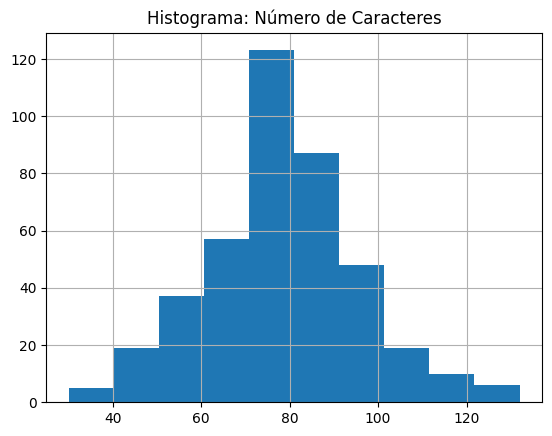

In [10]:
plot_hist([len(phrase) for phrase in text_entries], title="Histograma: Número de Caracteres")

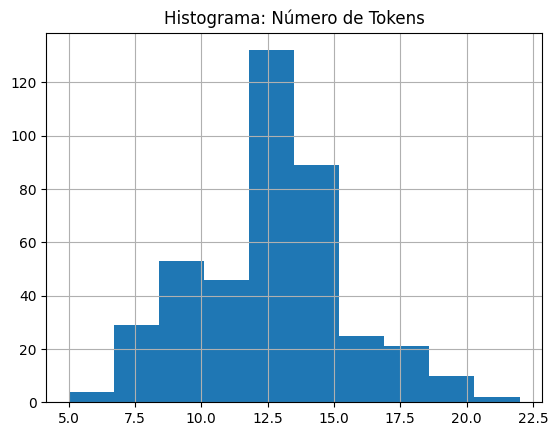

In [11]:
plot_hist([len(nltk.tokenize.word_tokenize(remove_punctuation(phrase), language="portuguese")) for phrase in text_entries], "Histograma: Número de Tokens")

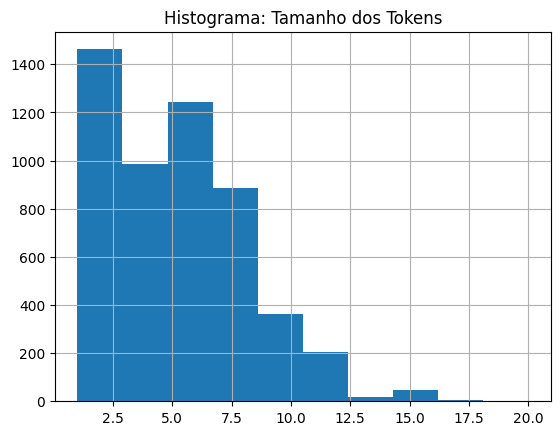

In [12]:
plot_hist([len(tk) for tk in tokenized_words], "Histograma: Tamanho dos Tokens")

## Palavras mais comuns

c:\Users\bianc\Desktop\Chatbot-NLP\modelos\classificador\..\common.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y,y=x, palette="Set2")


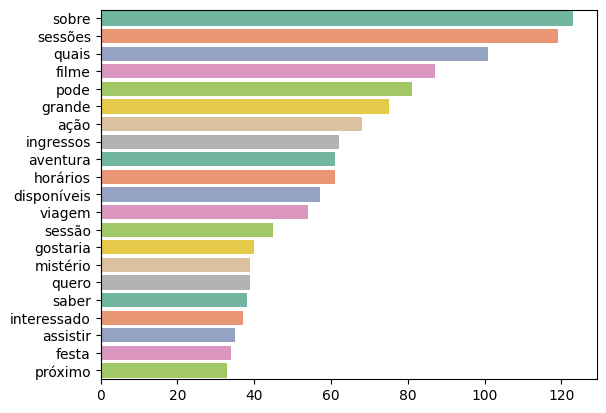

In [13]:
plot_most_frequent_word(tokenized_words, stopwords_pt)

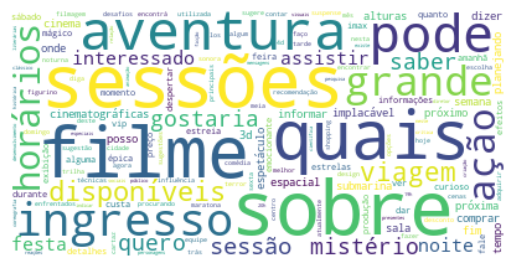

In [14]:
cloud_of_words(conc_text, stopwords_pt)